<font size=8><b>Machine Learning Task 2</b></font>
<br>   
<img src='https://media.tenor.com/LkQzw7k5DV4AAAAd/anime-hacking.gif'></img><center>not me 20min before deadline</center>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors
from sklearn.linear_model import LinearRegression
make_cmap = matplotlib.colors.LinearSegmentedColormap.from_list

In [2]:
# Jhaadu-pocha
df = pd.read_csv("IPL_2023.csv").dropna().sort_values(by=['6s'],ascending=False)

# Entries with "-" 
df=df[df.iloc[:,7]!='-']

# Remove * and cast to int
df["HS"] =df["HS"].str.split('*').str[0]
df["HS"] =df["HS"].astype(int)

# These are strings too. Floatify
df[["Avg","BF"]] = df[["Avg","BF"]].astype(float)

# Remove team stamp
df["Player"] = df["Player"].str.split('\n').str[0]

# Whew. Reindex
df.index=range(143)
df=df.drop('POS',axis=1)

# Done.
df

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,Faf Du Plessis,14,14,1,730,84,56.15,475.0,153.68,0,8,60,36
1,Shivam Dube,14,12,2,385,52,38.50,240.0,160.41,0,3,12,33
2,Glenn Maxwell,14,14,2,400,77,33.33,218.0,183.48,0,5,29,31
3,Rinku Singh,14,14,6,474,67,59.25,317.0,149.52,0,4,31,29
4,Ruturaj Gaikwad,14,13,1,504,92,42.00,340.0,148.23,0,3,36,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Manan Vohra,1,1,0,10,10,10.00,11.0,90.90,0,0,1,0
139,Joe Root,3,1,0,10,10,10.00,15.0,66.66,0,0,1,0
140,Hrithik Shokeen,7,2,1,23,18,23.00,16.0,143.75,0,0,4,0
141,Jaydev Unadkat,3,1,0,9,9,9.00,7.0,128.57,0,0,1,0


<center><h1>Exploring Correlations</h1></center>

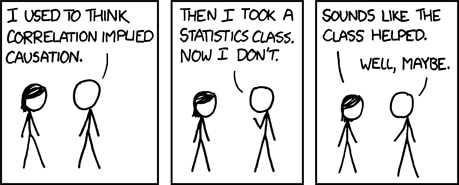
<center>very funny xkcd (rolling on floor)</center><br><br>

In [3]:
cols = ['Runs','4s','6s','100','50','SR','HS','Avg','NO','Mat','Inns']
correlation_matrix = df[cols].corr().to_numpy()

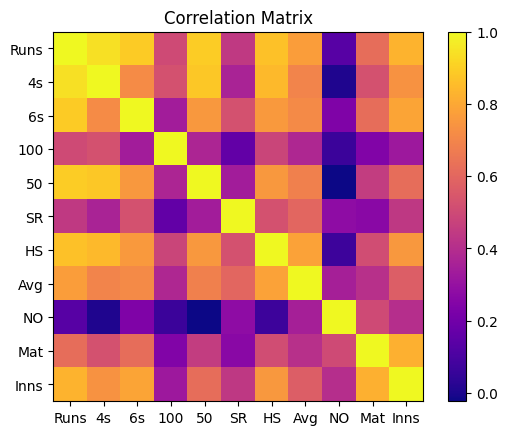

In [4]:
plt.imshow(correlation_matrix,cmap='plasma')
plt.xticks(np.arange(11), cols)
plt.yticks(np.arange(11), cols)

plt.title("Correlation Matrix")
plt.colorbar()
plt.show()

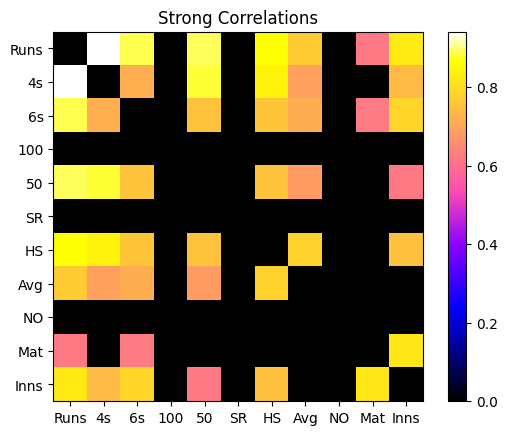

In [5]:
strong_corr = correlation_matrix.copy()
strong_corr[correlation_matrix<0.6]=0
np.fill_diagonal(strong_corr,0)

plt.imshow(strong_corr,cmap='gnuplot2')
plt.xticks(np.arange(11), cols)
plt.yticks(np.arange(11), cols)

plt.title("Strong Correlations")
plt.colorbar()
plt.show()

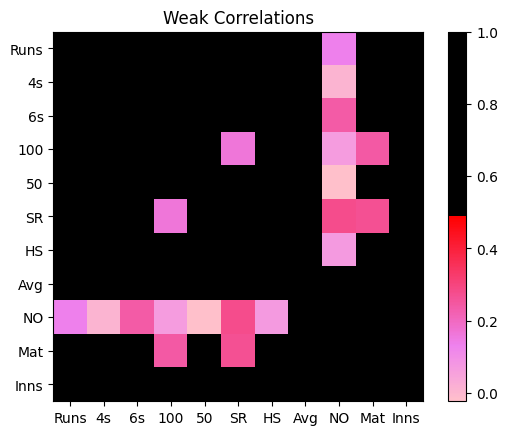

In [6]:
weak_corr = correlation_matrix.copy()
weak_corr[correlation_matrix>0.3]=1
np.fill_diagonal(weak_corr,1)

cmap1 = make_cmap("", [(0,"pink"),(0.15,"violet"),(0.5,"red"),(0.5,"black"),(1,"black")])
plt.imshow(weak_corr,cmap=cmap1)
plt.xticks(np.arange(11), cols)
plt.yticks(np.arange(11), cols)

plt.title("Weak Correlations")
plt.colorbar()
plt.show()

<br><br>    
<center><font size=2>Now presenting</font></center><br>  
<center><font size=8>Y vs X plots</font></center><br>
<center><font size=4>of my arbitrary preference</font></center>

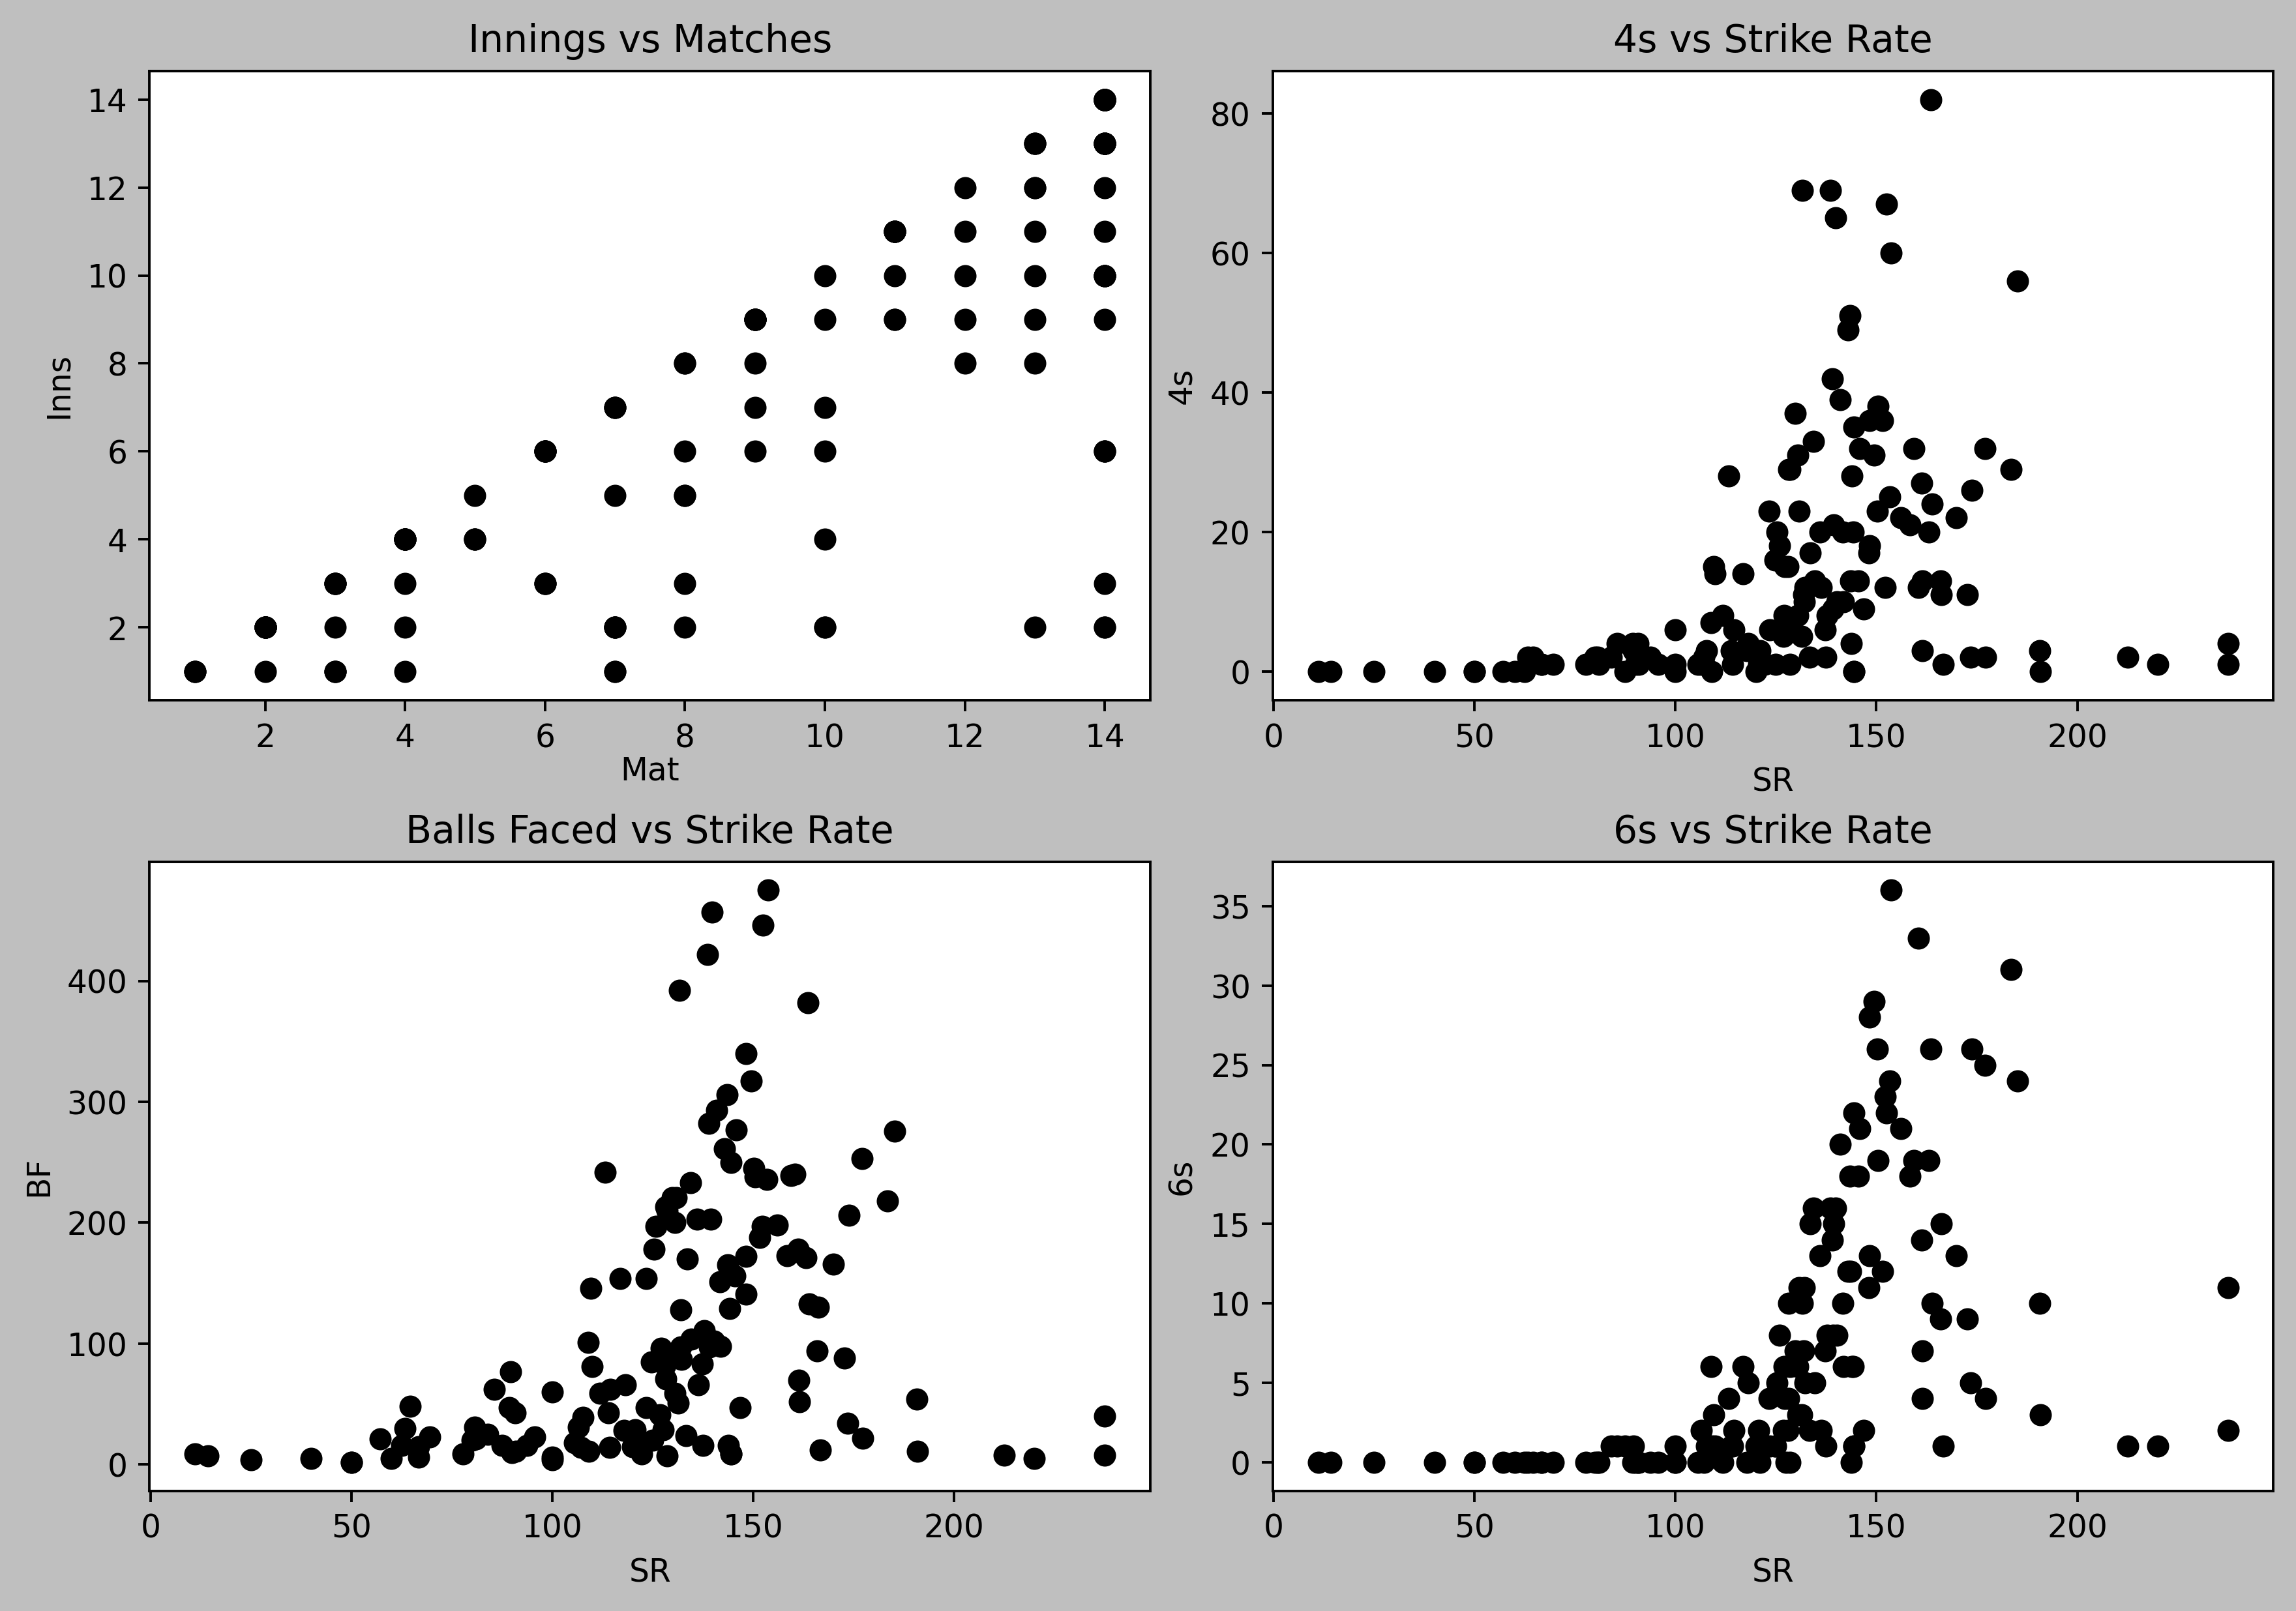

In [7]:
with plt.style.context('grayscale'):
    fig, ax = plt.subplots(2,2)
    fig.set_figwidth(10)
    fig.set_figheight(7)
    fig.set_dpi(350)
    
    ax[0,0].scatter(df['Mat'],df['Inns'])
    ax[0,0].set_xlabel('Mat',labelpad=0.5); ax[0,0].set_ylabel('Inns');
    ax[0,0].set_title('Innings vs Matches')

    ax[0,1].scatter(df['SR'],df['4s'])
    ax[0,1].set_xlabel('SR'); ax[0,1].set_ylabel('4s');
    ax[0,1].set_title('4s vs Strike Rate')

    ax[1,0].scatter(df['SR'],df['BF'])
    ax[1,0].set_xlabel('SR'); ax[1,0].set_ylabel('BF');
    ax[1,0].set_title('Balls Faced vs Strike Rate')

    ax[1,1].scatter(df['SR'],df['6s'])
    ax[1,1].set_xlabel('SR'); ax[1,1].set_ylabel('6s');
    ax[1,1].set_title('6s vs Strike Rate')


    fig.tight_layout(pad=0.5)
plt.show()

* <font size=4.5px><i>I like <u>graph[0][0]</u></i>: Can't bat more innings than matches; both axes discrete; pretty.</font>
  
  
  
* <font size=4px> The rest appear to beg to be compared to the normal distribution.</font>
<br>  

## Handy Tools

In [8]:
def StraightenDF(x):
    return x.to_numpy().reshape(-1,1)
def LinearPredictions(X,y):
    if type(X) is str: X=df[X]
    if type(y) is str: y=df[y]
    if type(X) is pd.core.series.Series: X=StraightenDF(X)
    if type(y) is pd.core.series.Series: y=StraightenDF(y)
    return LinearRegression().fit(X,y).predict(X)
    '''
    Example
    -----------------
    LinearPredictions('Avg','50') ----> 1d array of predictions of dependent df['50'] fitted to independent df['avg']
    LinearPredictions(df['Avg'],df['50']) ---> Also works
    '''
def DotAndPlot(*p):
    plt.scatter( df[p[0]], df[p[1]], label=p[0] )
    plt.plot( df[p[0]], LinearPredictions(p[0],p[1]) )
    '''
    Ex: D&P('4s','Runs'), D&P(df['4s'],df['50'])
    >>> Scatter + Best Fit
    '''
def y_4s_from_batter_true(batter_index): return df[df.index==batter_index]['4s'].to_numpy()
def y_4s_from_batter_pred(batter_index): return y_pred[batter_index]

<p><center><h1>Nigh-Linear Relations for Runs</h1></center>  
<br>
    
<font size=3>Based on the correlations, I expect the following to give straight lines:</font></p>

><font size=4>Runs,   6s,   50,   HS,   Average,   Inns

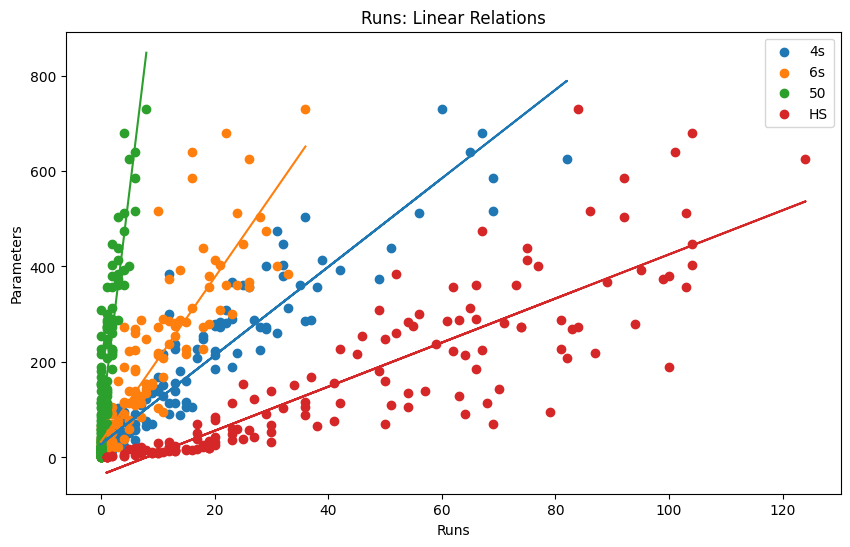

In [9]:
# Plot first four
plt.figure(figsize=(10,6))
DotAndPlot('4s','Runs');  DotAndPlot('6s','Runs')
DotAndPlot('50','Runs');  DotAndPlot('HS','Runs')

plt.xlabel('Runs'); plt.ylabel('Parameters');
plt.title('Runs: Linear Relations')
plt.legend()
plt.show()

<br><center><font size=4> Clean! HS and 6s not so much but yay.</font></center><br/>

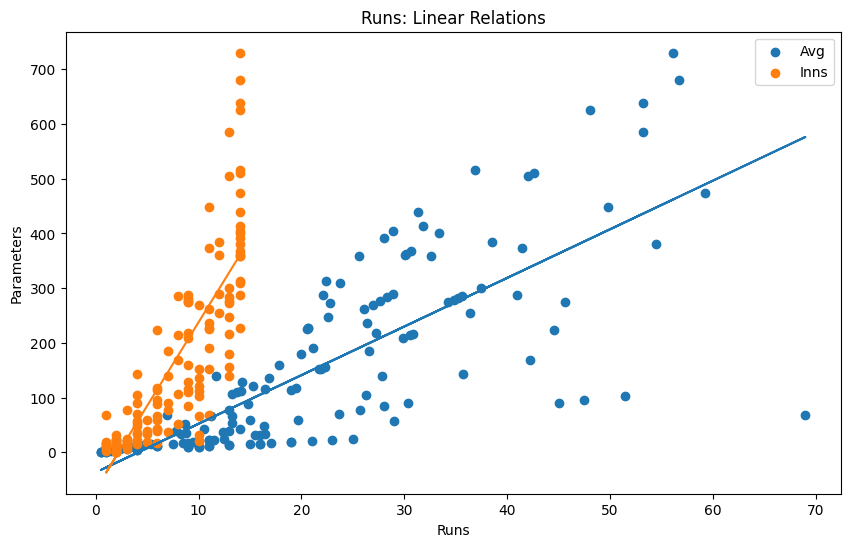

In [10]:
# Plot remaining

plt.figure(figsize=(10,6))
DotAndPlot('Avg','Runs');  DotAndPlot('Inns','Runs')

plt.xlabel('Runs'); plt.ylabel('Parameters');
plt.title('Runs: Linear Relations')
plt.legend()
plt.show()

<br>
<center><font size=4> <b>Yucky</b>. Eliminated as parameters</font><center>
<br/>
    

In [11]:
# Why create two dataframes when you can make two np.ndarrays?
X = np.array(list(zip(df.index,df['Runs'],df['6s'],df['50'],df['HS'])))
y_pred = LinearPredictions(X[:,1:], '4s')


# _Interactive Cell!_

In [33]:
def batter_ind(ind:int=-1)->int: return ind if ind in range(143) else np.random.randint(1,143)


# Insert static value in parenthesis, or simply run this cell continuously
batsman  = batter_ind()
#batsman = batter_ind(69)


b1 = y_4s_from_batter_true(batsman)
b2 = y_4s_from_batter_pred(batsman)
print(f"\nYou picked batsman no. {batsman}, who had {b1} 4s.")
print(f"By the way, regression predicts {b2}, which is only off by {abs(b1-b2)}\n")


You picked batsman no. 39, who had [17] 4s.
By the way, regression predicts 1, which is only off by [16]



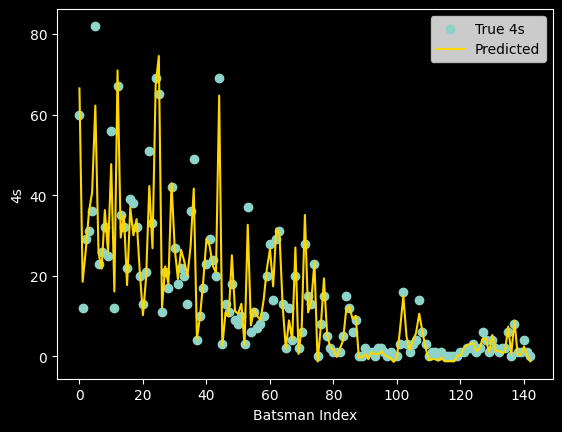

In [13]:
# Cool looking plot
x = range(143)
with plt.style.context('dark_background'):
    plt.scatter(x,y_4s_from_batter_true(x),label='True 4s')
    plt.plot(x,y_4s_from_batter_pred(x),'gold',label='Predicted')
plt.xlabel("Batsman Index"); plt.ylabel("4s")
plt.legend()
plt.show()

### Tempting to imagine the full 5D glory of this multilinear regression, right?
<br><br/>

# Plot Predictions against Reality and apply Metrics

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
# Create
y_true = df['4s'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y_true)

# Fit
Model = LinearRegression().fit(X_train[:,1:],y_train)

# Predict
y_pred = Model.predict(X_test[:,1:])
y_pred_train = Model.predict(X_train[:,1:])

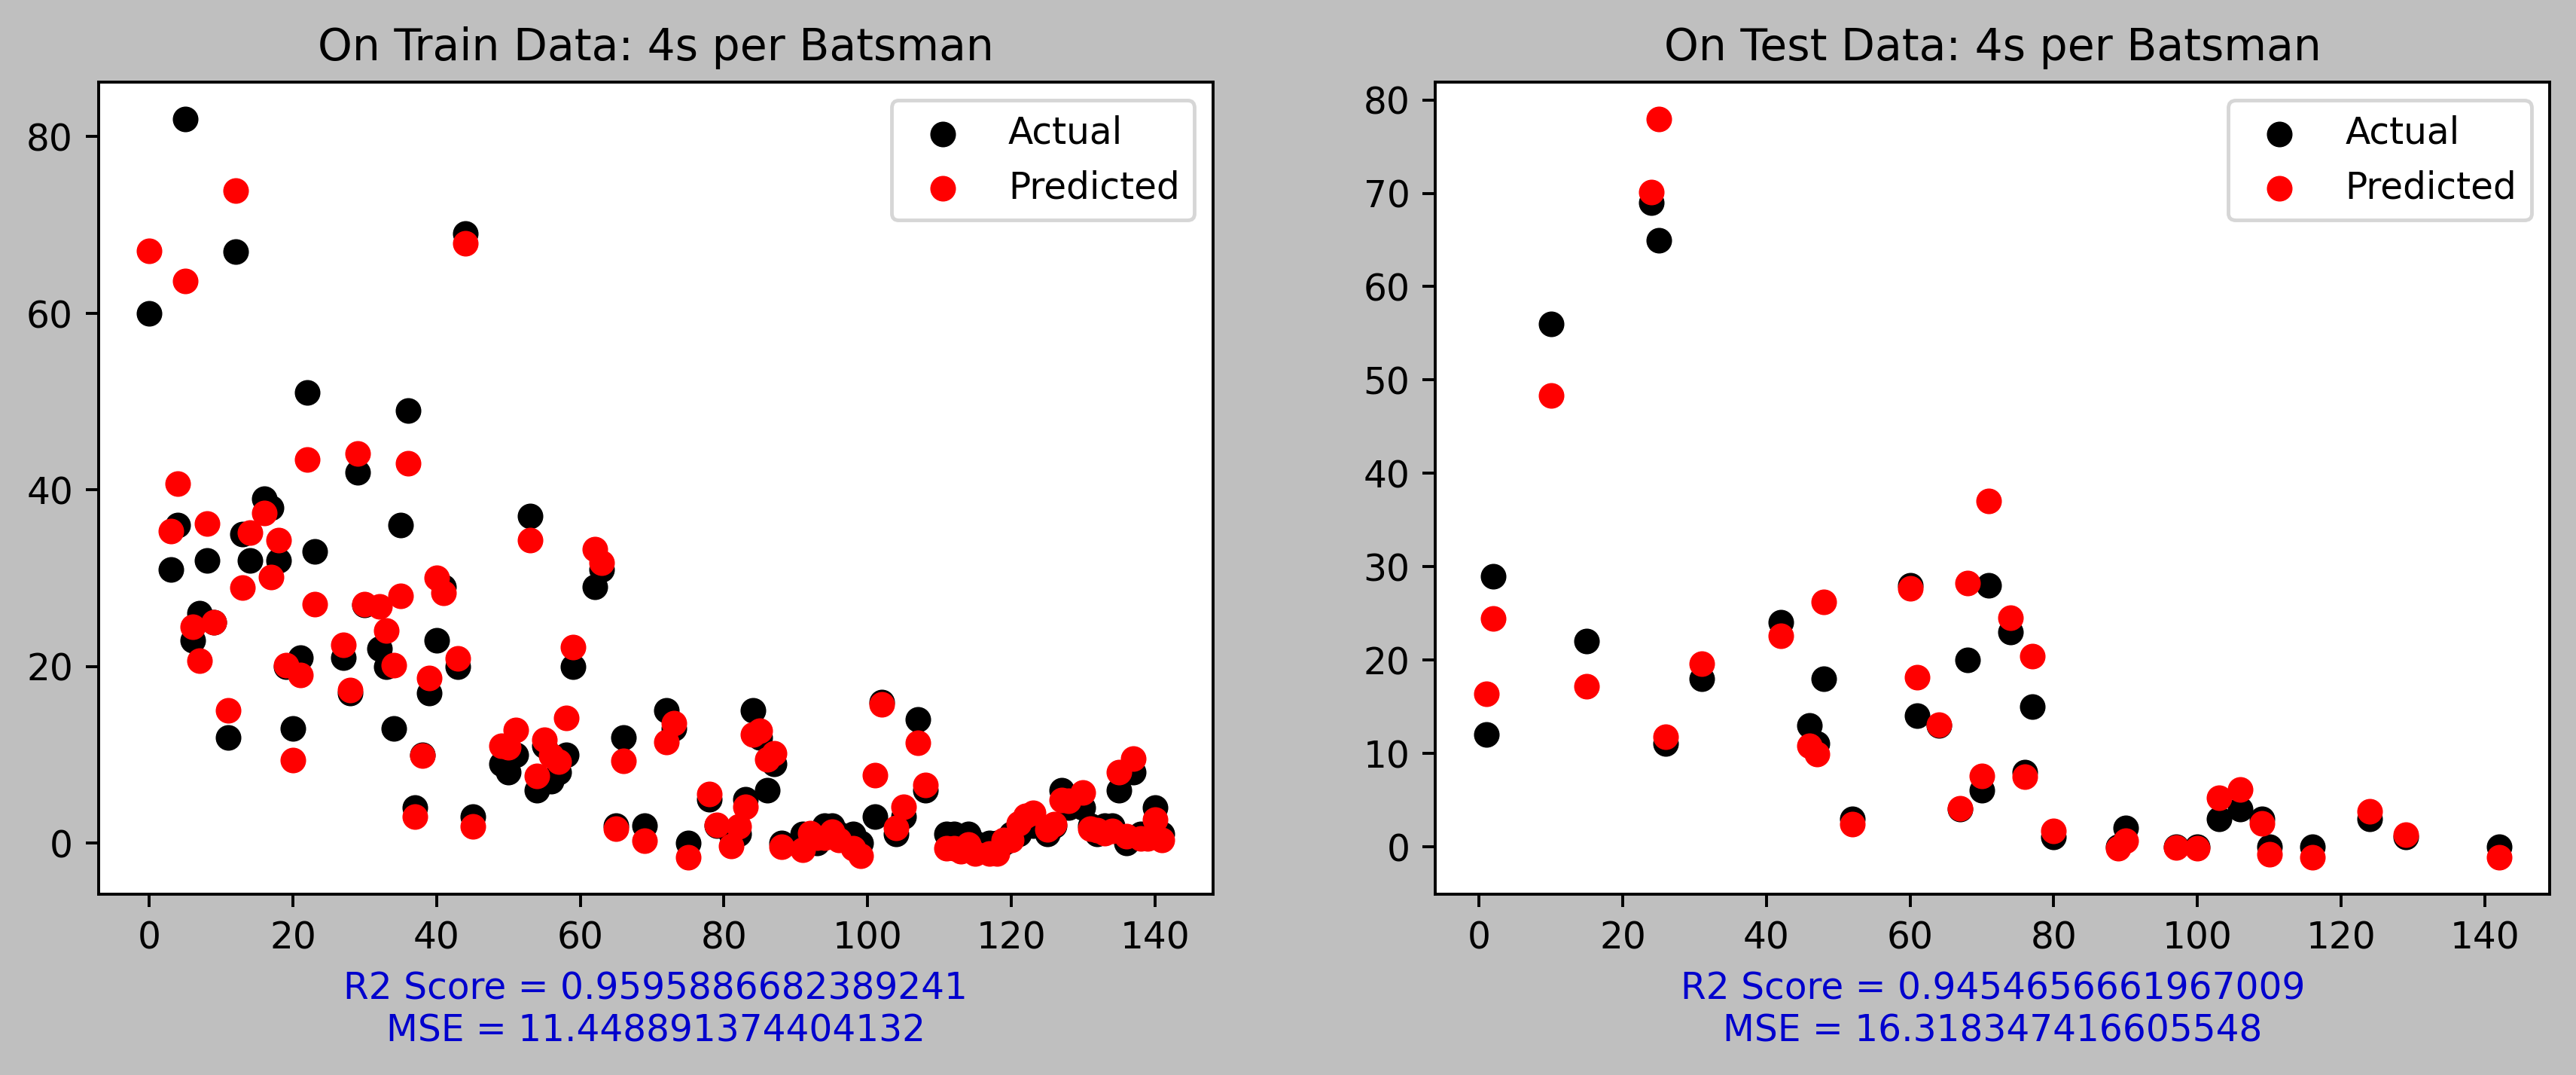

In [16]:
# Plot
with plt.style.context('grayscale'):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(12,4)
    plt.gcf().set_dpi(350)

    ax1.scatter(X_train[:,0],y_train,label='Actual')
    ax1.scatter(X_train[:,0], y_pred_train, color='r',label='Predicted')
    ax1.set_title("On Train Data: 4s per Batsman")
    ax1.set_xlabel(f'R2 Score = {r2_score(y_train,y_pred_train)}\nMSE = {mean_squared_error(y_train, y_pred_train)}')
    ax1.xaxis.label.set_color('mediumblue')
    ax1.legend()

    ax2.scatter(X_test[:,0],y_test,label='Actual')
    ax2.scatter(X_test[:,0], y_pred, color='r',label='Predicted')
    ax2.set_title("On Test Data: 4s per Batsman")
    ax2.set_xlabel(f'R2 Score = {r2_score(y_test,y_pred)}\nMSE = {mean_squared_error(y_test, y_pred)}')
    ax2.xaxis.label.set_color('mediumblue')
    ax2.legend()
        
plt.show()

<center><font size=5> With batsman index on X, and 4s on the axis of Y. </font></center>
<br>
<center><font size=4>And if I combine the two,</font></center>

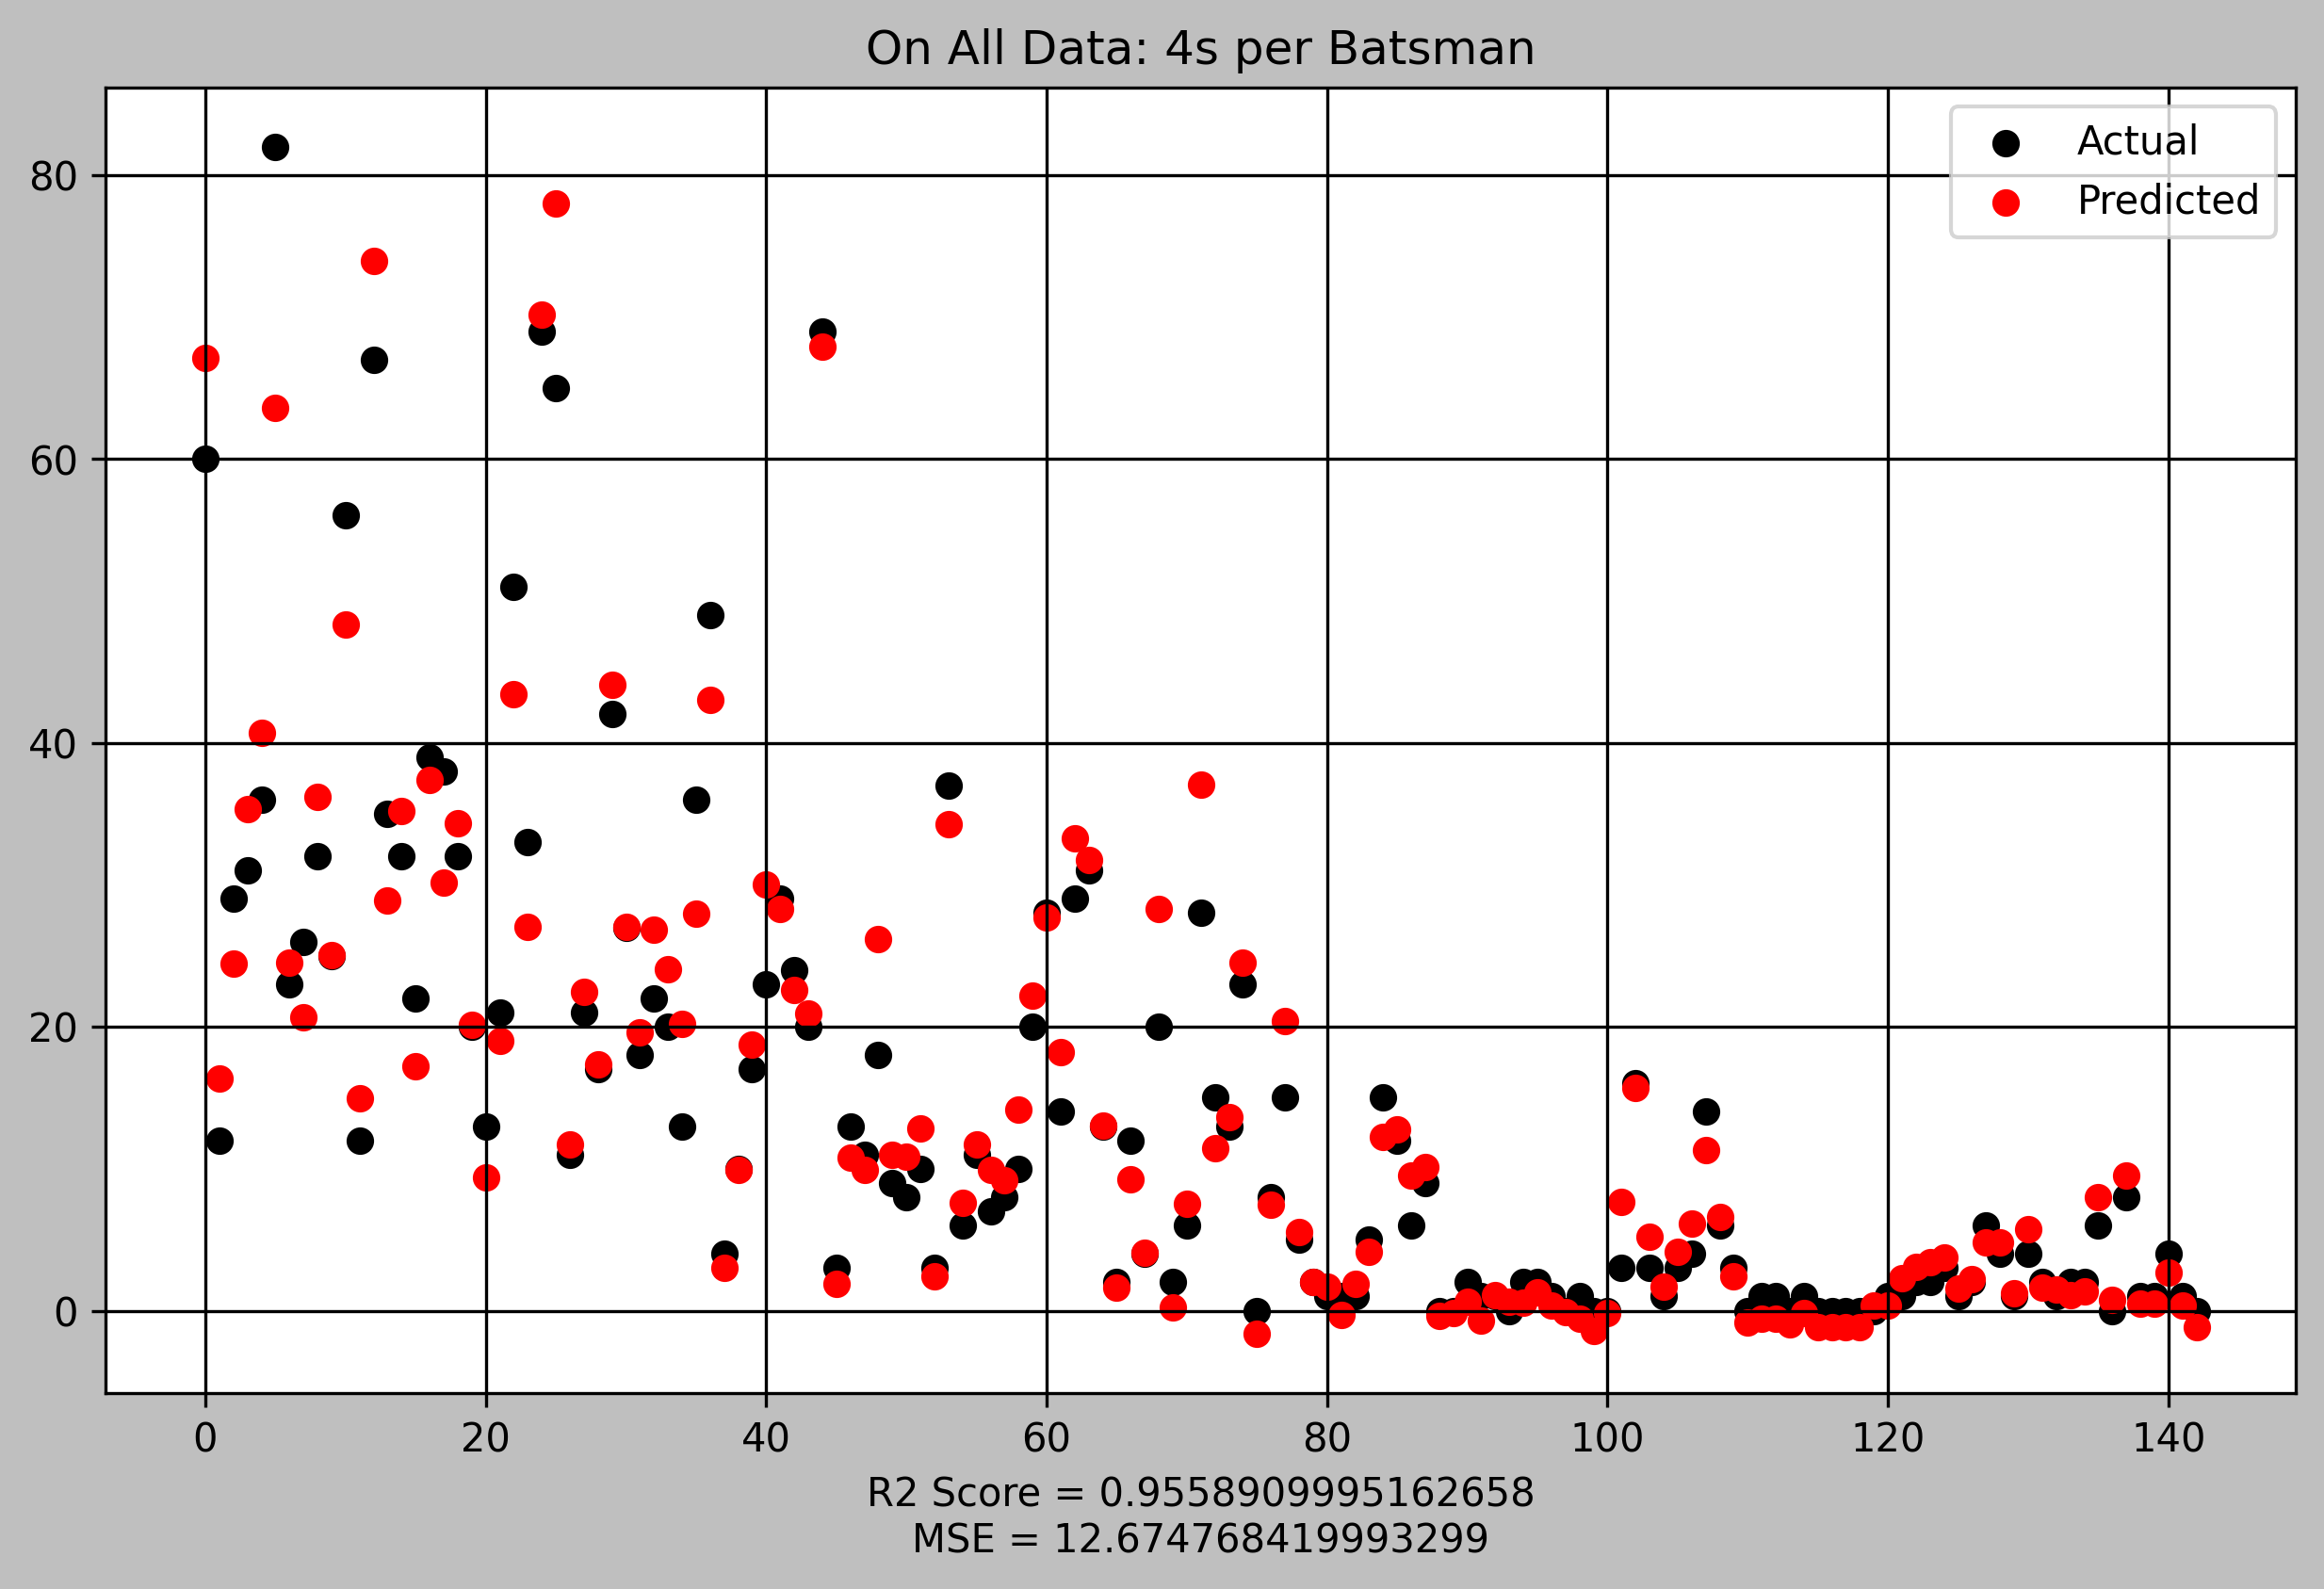

In [17]:
# Plot Actual vs Predicted over full data

Y_pred = Model.predict(X[:,1:])
with plt.style.context('grayscale'):
    plt.figure(figsize=(10,6))
    plt.scatter(X[:,0],y_true,label='Actual')
    plt.scatter(X[:,0], Y_pred, color='r',label='Predicted')

plt.legend()
plt.title("On All Data: 4s per Batsman")
plt.xlabel(f'R2 Score = {r2_score(y_true,Y_pred)}\nMSE = {mean_squared_error(y_true, Y_pred)}')
plt.grid(1)
plt.gcf().set_dpi(300)

plt.show()

In [18]:
# Number of unique values in each column
df.nunique()

# Looks like 50s, 100s and NOs can be logistically regressed. Mat and Inns too if we're brave.

Player    143
Mat        14
Inns       14
NO          9
Runs      114
HS         75
Avg       119
BF        107
SR        134
100         3
50          8
4s         46
6s         31
dtype: int64

# <center>Logistic Regression</center>
## Analyse data

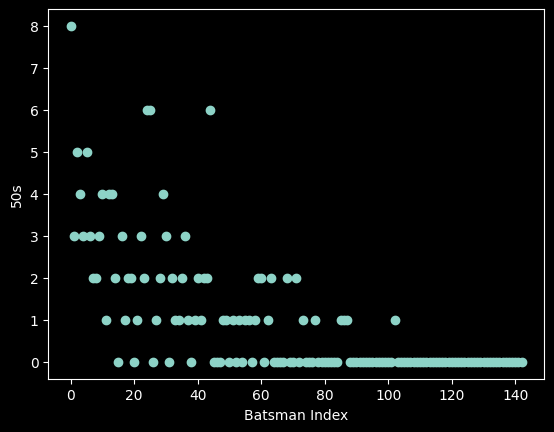

In [19]:
with plt.style.context('dark_background'):
    plt.scatter(df.index,df['50'])
    plt.ylabel('50s'); plt.xlabel('Batsman Index')
plt.show()

## Ready the tools

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [21]:
def Scaled(X: np.ndarray)->np.ndarray:
    ''' 
    Will scale all values except index

    '''
    return np.hstack(
        (
        X[:,[0]],
        StandardScaler()
            .fit(X[:,1:])
            .transform(X[:,1:])
        )
    )

# "Scale your X bro" - scikit warning

## Based on correlations, pick HS, 4s and Runs to predicts 50s

In [22]:
# Full data
X = df.loc[:,['HS','4s','Runs']].reset_index().to_numpy()
y = df.iloc[:,10]

# Scale features except index
X = Scaled(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Train
model = LogisticRegression(max_iter=10000).fit(X_train[:,1:],y_train)

In [23]:
# Set the stage for K Fold Cross Validation
# Try changing n?

n = 12
kf = KFold(n_splits=n, random_state=1, shuffle=True)

In [24]:
# Scores in all K runs
scores = cross_val_score(model,
                         X[:,1:],
                         y,
                         scoring='accuracy',
                         cv = kf,
                        )
scores

array([0.75      , 0.66666667, 0.66666667, 0.66666667, 0.58333333,
       0.83333333, 0.66666667, 0.91666667, 0.75      , 0.66666667,
       0.5       , 0.90909091])

In [25]:
# Cherry-pick the best regression

itrain,itest = list(kf.split(X[:,1:]))[np.where(scores==scores.max())[0][0]]
X_train = X[:,1:][itrain]
X_test = X[:,1:][itest]
y_train = y[X[:,0][itrain]]
y_test = y[X[:,0][itest]]
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Check : Matches max entry of scores in previous cell

0.9166666666666666

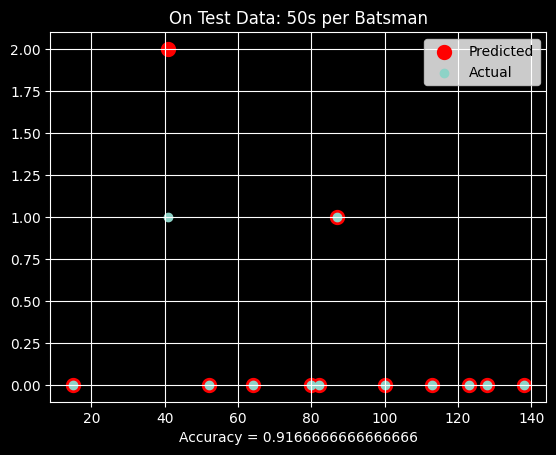

In [26]:
# Plot regression on Test Data
y_pred = model.predict(X_test)

with plt.style.context('dark_background'):
    plt.scatter(X[:,0][itest],y_pred, label='Predicted', color='r', linewidths=5)
    plt.scatter(X[:,0][itest],y_test,label='Actual')

plt.xlabel(f'Accuracy = {model.score(X_test,y_test)}')

plt.grid(1)
plt.legend()
plt.title("On Test Data: 50s per Batsman")
plt.show()

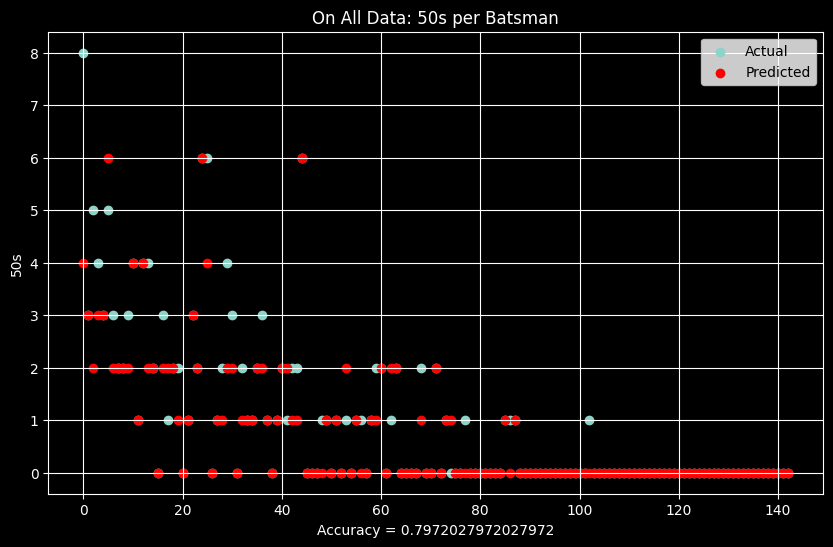

In [27]:
# Plot regression on full data
y_pred = model.predict(X[:,1:])


with plt.style.context('dark_background'):
    plt.figure(figsize=(10,6))
    plt.scatter(X[:,0],y,label='Actual')
    plt.scatter(X[:,0],y_pred, label='Predicted', color='r')#, linewidths=5)

plt.xlabel(f'Accuracy = {model.score(X[:,1:],y)}')
plt.ylabel('50s')

plt.legend()
plt.grid(1)
plt.title("On All Data: 50s per Batsman")
plt.show()


# Logistic Regression Performance over K-Fold CrossVal
<br>

In [28]:
display(
    pd.DataFrame({"Mean":np.mean(scores),
              "Std Dev":np.std(scores),
              "Variance":np.var(scores),
              "Best":np.max(scores),
              "75%":np.quantile(scores,0.75),
              "50%":np.quantile(scores,0.50),
              "25%":np.quantile(scores,0.25),
              "Weakest":np.min(scores)},
             ['accuracy'])
      .style.set_properties(**{'width': '115px'})
    )

,Mean,Std Dev,Variance,Best,75%,50%,25%,Weakest
accuracy,0.714646,0.119036,0.014169,0.916667,0.770833,0.666667,0.666667,0.500000


### With a mean accuracy around $70$% and a weakest score that sometimes dips below $40$%, it is clear that the data has a region which doesn't lend well to generalization via logistic regression (viz. batsman_index>80: nearly all 0s)
### I wouldn't consider it a good method due to the broad spectrum of accuracies which are highly training-sample-dependent and erratic.